<a href="https://colab.research.google.com/github/oldairjsilva/IGTI/blob/main/Plano_saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto etapas do processamento do Big Data

o objetivo é realizar um agrupamento de pessoas de acordo com o grupo de risco que se encontra baseado no peso e no colesterol. Para isso, vamos seguir as etapas do processamento do Big Data

Coleta de dados(1) >> Preparação de dados(2) >> Análise de dados(3) >> Modo Analítico(4) >> Visualização(5)

### Coleta dos dados
Nesta etapa, são definidas as fontes a serem utilizadas para gerar armazenamento, podendo ser bancos de dados SQL, NoSQL, Frameworks e muitas outras fontes.
Para esse exercício vamos coletar dados já estruturados de dois arquivos. Um arquivo Excel no formato xlxs e outro no formato csv.

### Coletando dados de estados brasileiros

In [5]:
import pandas as pd # biblioteca de leitura e tratamento de dataframes

# lendo arquivo
estados = pd.read_csv('estados_brasileiros.csv', sep = ';', encoding = 'latin-1')

In [6]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


### Coletando dados de clientes

In [7]:
clientes = pd.read_excel('amostra_dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


### Coletando dados das idades dos clientes

In [8]:
idade = pd.read_csv('idade_clientes.csv', sep = ';', encoding = 'latin-1')
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


### Preparação dos dados
É a etapa minuciosa onde os dados são "limpos" e se tornam aptos para a análise. Esssa etapa tem o objetivo de reduzir discrepâncias, evitar valores nulos, indicar as anomalias e preencher lacunas. Essas informações, se não tratadas, acabam prejudicando o processo como um todo, já que a análise poderá ser comprometida caso os dados não sejam verdadeiros.


### Analisando as variáveis da base de dados

In [9]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  225 non-null    int64  
 1   peso        220 non-null    float64
 2   colesterol  225 non-null    int64  
 3   genero      225 non-null    object 
 4   id_estado   225 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 8.9+ KB


In [10]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,225.000000,220.000000,225.000000,225.000000
mean,113.000000,142.018182,168.733333,13.711111
std,65.096083,30.985482,39.413671,7.562307
min,1.000000,95.000000,102.000000,1.000000
25%,57.000000,115.000000,135.000000,7.000000
50%,113.000000,138.500000,168.000000,14.000000
75%,169.000000,169.250000,204.000000,20.000000
max,225.000000,203.000000,235.000000,27.000000


In [11]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [12]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [13]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


### Analisando dados ausentes

In [14]:
# Verificando valores ausentes/nulos na base
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [15]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [16]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [17]:
# Verificando os registros com valores nulos
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


Identificamos 5 valores ausentes na base de dados de clientes. Para esse caso, temos 3 opções para tratamento de dados numéricos.

1.   Eliminação dos registros
2.   Média dos pesos dos clientes: Realiza a média dos pesos OBS: A média é fortemente influenciada pela presença de valores externos;
3.   Mediana dos pesos dos clientes. Realiza a mediana dos pesos. (medida que pega o valor central dos dados)






### Eliminando dados ausentes

In [18]:
# Dados ausentes
clientes.dropna(subset = ['peso'], inplace = True) # para eliminar o registro. Inplace = True significa que quer alterar os dados naquele dataframe

In [19]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [20]:
clientes.count()

id_cliente    220
peso          220
colesterol    220
genero        220
id_estado     220
dtype: int64

### Alterando os dados por outras medidas

In [21]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,220.000000,220.000000,220.000000,220.000000
mean,112.272727,142.018182,168.318182,13.627273
std,65.092405,30.985482,39.494392,7.588575
min,1.000000,95.000000,102.000000,1.000000
25%,55.750000,115.000000,134.500000,7.000000
50%,112.500000,138.500000,167.500000,13.500000
75%,168.250000,169.250000,204.000000,20.000000
max,225.000000,203.000000,235.000000,27.000000


In [22]:
# Realizando a média e mediana da variavel peso
media = clientes.peso.mean()
mediana = clientes.peso.median()

In [23]:
# Verificando valores
print(f"O valor da média dos pesos é {media}\nO valor da mediana é {mediana}")

O valor da média dos pesos é 142.01818181818183
O valor da mediana é 138.5


In [ ]:
# Fazendo arredondamento da variavel média
round(media, 2)

142.02

In [24]:
# Preencher valores ausentes pela média
clientes.peso.fillna(round(media, 2), inplace = True)

In [25]:
# Verifica se existe algum valor ausente
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [26]:
clientes.count()

id_cliente    220
peso          220
colesterol    220
genero        220
id_estado     220
dtype: int64

### Substituindo variável categórica
Quando temos uma variável do tipo categórica, uma abordagem é substituir o valor ausente pela variável mais frequente encontrada no conjunto de dados.

In [27]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [28]:
estados.pais.fillna('Brasil', inplace = True)

In [29]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

### Analisando distribuição dos dados

In [30]:
import matplotlib.pyplot as plt

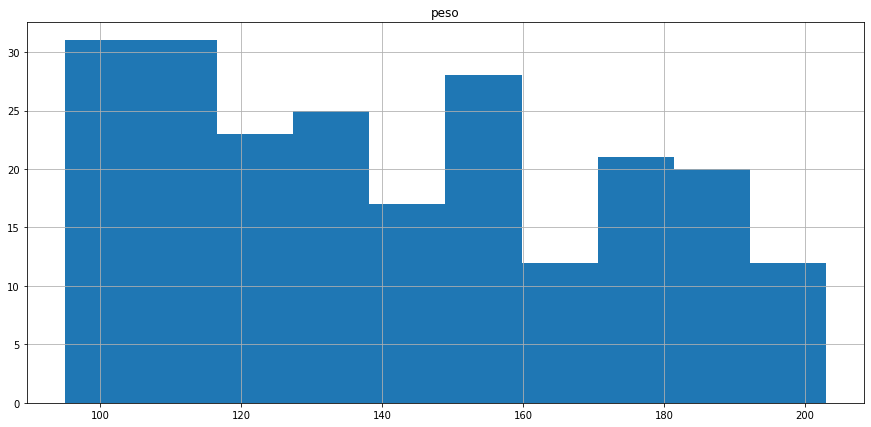

In [31]:
clientes.hist(column='peso', figsize=(15,7))
plt.show()

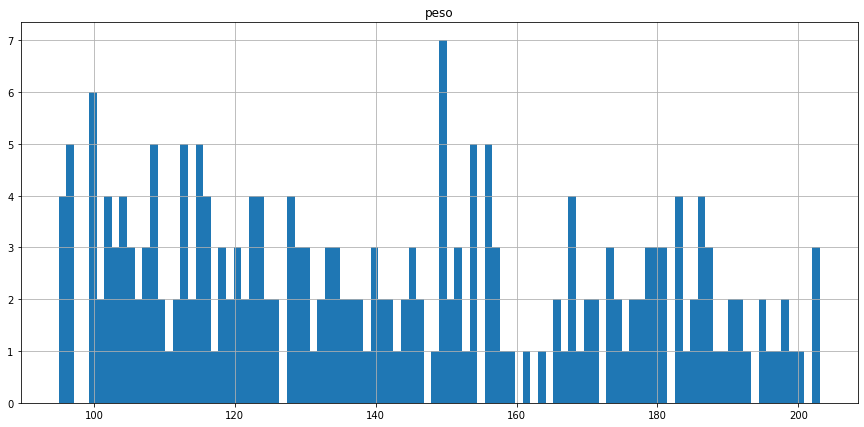

In [32]:
clientes.hist(column='peso', figsize=(15,7), bins=100)
plt.show()

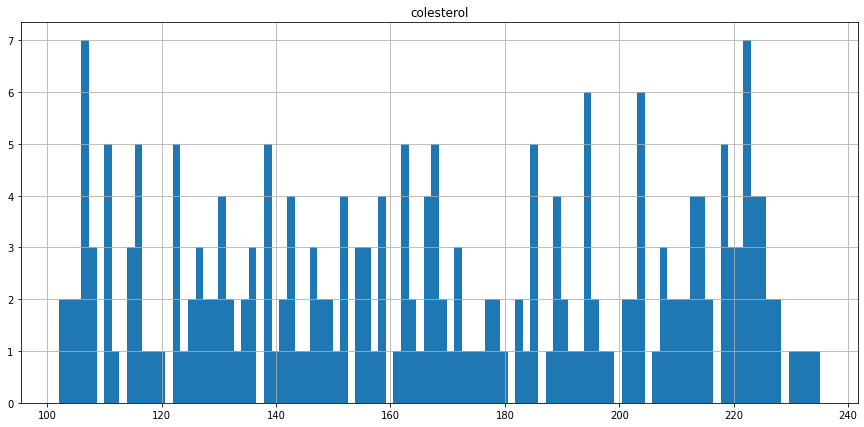

In [33]:
clientes.hist(column='colesterol', figsize=(15,7), bins=100)
plt.show()

In [34]:
# Criando um identificador para a variavel genero
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [35]:
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
220,221,180.0,219,Masculino,20,1
221,222,116.0,138,Feminino,15,0
222,223,144.0,169,Feminino,18,0
223,224,102.0,116,Masculino,6,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9f5f2e810>]],
      dtype=object)

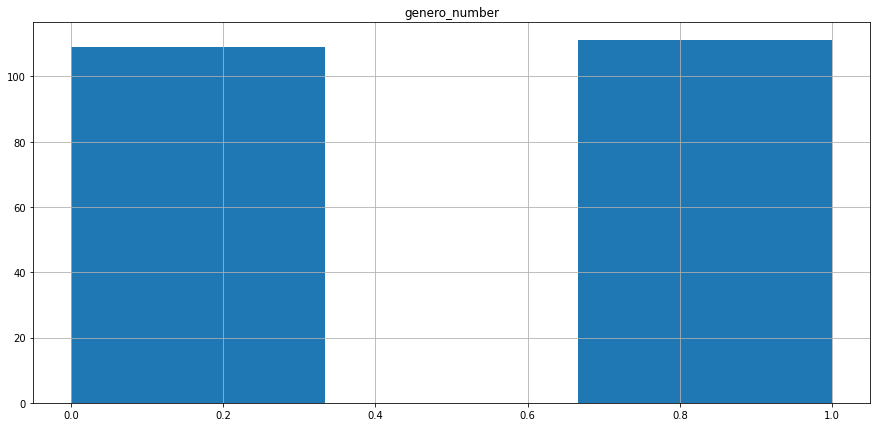

In [36]:
clientes.hist(column='genero_number', figsize=(15,7), bins=3)

### Junções entre os dados coletados
Nessa etapa vamos realizar o merge entre os dados que realizamos a coleta

In [37]:
estados[:5]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [38]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [39]:
clientes_estados = pd.merge(clientes, estados, on = 'id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
8,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
20,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
31,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil
37,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
164,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil
123,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil
192,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil
75,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil


In [40]:
# Realiza Junção entre clientes e idades
base_completa = pd.merge(clientes_estados, idade, on = 'id_cliente').sort_values('id_cliente')

In [41]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
8,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
20,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
31,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
37,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
164,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
123,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
192,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
75,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


In [42]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
4,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
215,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
216,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
217,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
218,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


### Organizando a base de dados
Podemos realizar várias alterações na base de dados a fim de melhorar o entendimento e disposição das colunas. Além disso, podemos fazer transformações nos textos das linhas e colunas.

In [43]:
# Alterando nome das colunas
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace = True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
8,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
20,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
31,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
37,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
164,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
123,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
192,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
75,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


In [44]:
# Alterando as linhas da variavel sigla_estado
base_completa.sigla_estado.str.upper()

0      RR
8      DF
20     AM
31     SC
37     SE
       ..
164    RN
123    PB
192    PI
75     CE
19     DF
Name: sigla_estado, Length: 220, dtype: object

In [45]:
# Inserindo alteração realizada
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [46]:
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
8,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
20,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
31,4,140.0,167,Feminino,24,0,Santa Catarina,SC,Brasil,55
37,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
164,221,180.0,219,Masculino,20,1,Rio Grande do Norte,RN,Brasil,33
123,222,116.0,138,Feminino,15,0,Paraíba,PB,Brasil,38
192,223,144.0,169,Feminino,18,0,Piauí,PI,Brasil,24
75,224,102.0,116,Masculino,6,1,Ceará,CE,Brasil,31


### Alterando disposição das colunas do arquivo de dados
Vamos alterar as disposições das colunas no nosso conjunto de dados a fim de facilitar a visualização.

In [47]:
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
8,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
20,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
31,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
37,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
164,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,Brasil
123,222,Feminino,38,116.0,138,15,Paraíba,PB,Brasil
192,223,Feminino,24,144.0,169,18,Piauí,PI,Brasil
75,224,Masculino,31,102.0,116,6,Ceará,CE,Brasil


In [48]:
base_completa = base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']].reset_index(drop = True)

In [49]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
215,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,Brasil
216,222,Feminino,38,116.0,138,15,Paraíba,PB,Brasil
217,223,Feminino,24,144.0,169,18,Piauí,PI,Brasil
218,224,Masculino,31,102.0,116,6,Ceará,CE,Brasil


### Análise de dados
É a etapa onde selecionamos os algoritmos de Machine Learning que serão inseridos para alcançar o resultado, levando em consideração o conjunto de dados obtidos na etapa anterior.
Para esse trabalho, vamos realizar um agrupamento de pessoas baseado no colesterol, peso e idade das pessoas.

### Aplicando método do cotovelo
Vamos iniciar visualizando identificando o número de clusters necessários para realizar o agrupamento

In [50]:
from sklearn.cluster import KMeans

In [61]:
def calcular_wcss(dados_cliente):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X = dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [56]:
dados_cliente = base_completa[['peso', 'colesterol', 'idade']]
dados_cliente.head()

,peso,colesterol,idade
0,102.0,111,17
1,115.0,135,28
2,115.0,136,62
3,140.0,167,55
4,130.0,158,44


In [59]:
wcss_clientes = calcular_wcss(dados_cliente)

In [62]:
type(wcss_clientes)

list

In [60]:
# Visualizando os dados obtidos do WCSS
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de WCSS de {wcss_clientes[i]}')

O cluster 0 possui valor de WCSS de 604089.0363636361
O cluster 1 possui valor de WCSS de 183696.23017731684
O cluster 2 possui valor de WCSS de 109541.72286036039
O cluster 3 possui valor de WCSS de 84091.80765177334
O cluster 4 possui valor de WCSS de 71035.02256493381
O cluster 5 possui valor de WCSS de 59337.80265945634
O cluster 6 possui valor de WCSS de 47907.78412425541
O cluster 7 possui valor de WCSS de 42387.50450262156
O cluster 8 possui valor de WCSS de 35685.37458656063
O cluster 9 possui valor de WCSS de 30831.02253207221


### Visualizando o gráfico do cotovelo

In [63]:
import plotly.express as px # Criação de gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objects as go # Para criação e concatenização de graficos

In [66]:
grafico_wcss = px.line(x = range(1,11), 
                       y = wcss_clientes
                       )
fig = go.Figure(grafico_wcss)
fig.update_layout(title = 'Calculando o WCSS', 
                  xaxis_title = 'Número de clusters',
                  yaxis_title = 'Valor do wcss',
                  template = 'plotly_white'
                  )
fig.show()

In [67]:
kmeans_clientes = KMeans(n_clusters=3, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

In [68]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,0
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,0
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,0
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,2
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,2
...,...,...,...,...,...,...,...,...,...,...
215,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,Brasil,1
216,222,Feminino,38,116.0,138,15,Paraíba,PB,Brasil,0
217,223,Feminino,24,144.0,169,18,Piauí,PI,Brasil,2
218,224,Masculino,31,102.0,116,6,Ceará,CE,Brasil,0


### Calcula os centroides de cada cluster

In [69]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[109.64197531, 124.9382716 ,  42.56790123],
       [181.68181818, 216.21212121,  44.51515152],
       [142.08219178, 173.15068493,  41.78082192]])

Aqui temos os centroides dos 3 clusters de acordo com os atributos. Nesse exemplo vemos os centroides de 'peso', 'colesterol', 'idade' respectivamente.

In [70]:
dados_cliente

,peso,colesterol,idade
0,102.0,111,17
1,115.0,135,28
2,115.0,136,62
3,140.0,167,55
4,130.0,158,44
...,...,...,...
215,180.0,219,33
216,116.0,138,38
217,144.0,169,24
218,102.0,116,31


In [72]:
grafico = px.scatter(x = base_completa['peso'],
                     y = base_completa['colesterol'],
                     color = base_completa['cluster'])
grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7])
grafico_final = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final.show()

### Visualizando e alterando layout do gráfico

In [73]:
grafico = px.scatter(x = base_completa['peso'],
                     y = base_completa['colesterol'],
                     color = base_completa['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title = 'Análise de Clusters',
                  xaxis_title = 'Colesterol',
                  yaxis_title = 'peso',
                  )
fig.show()

### Criando Função para gerar gráficos

In [76]:
def plotar_grafico(x, y, xlabel, y_label):
  grafico = px.scatter(x = x,
                       y = y,
                       color = base_completa['cluster'])
  fig = go.Figure(grafico)

  fig.update_layout(title = 'Análise de Clusters',
                    xaxis_title = xlabel,
                    yaxis_title = y_label,
                    )
  fig.show()

In [77]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol', 'peso')

In [78]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

In [79]:
plotar_grafico(base_completa['idade'], base_completa['colesterol'], 'idade', 'colesterol')

### Segmentando os clientes baseado na análise dos clusters
Agora vamos analisar os dados dos clusters referente aos atributos peso e colesterol e atribuir nomes que representam aquele agrupamento.
Vamos agrupar em 3 tipos:
  Alto risco: Peso e colesterol altos
  Baixo risco: Baixo peso e colesterol baixo
  Moderado risco: peso e colesterol medianos

In [80]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x, y)

In [81]:
cluster_clientes = base_completa

In [82]:
# Segmentando os clientes baseado na análise dos clusters
cluster_clientes.loc[cluster_clientes['cluster'] == 2, 'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster'] == 1, 'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster'] == 0, 'nome_cluster'] = 'Risco Moderado'

In [83]:
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,0,Risco Moderado
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,0,Risco Moderado
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,0,Risco Moderado
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,2,Alto Risco
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,2,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...
215,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,Brasil,1,Baixo Risco
216,222,Feminino,38,116.0,138,15,Paraíba,PB,Brasil,0,Risco Moderado
217,223,Feminino,24,144.0,169,18,Piauí,PI,Brasil,2,Alto Risco
218,224,Masculino,31,102.0,116,6,Ceará,CE,Brasil,0,Risco Moderado


### Análises dos clusters criados

In [84]:
# Verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,73.0,41.780822,14.852279,16.0,30.00,42.0,53.0,70.0
Baixo Risco,66.0,44.515152,16.071228,16.0,31.25,47.0,59.5,69.0
Risco Moderado,81.0,42.567901,15.526540,17.0,29.00,42.0,55.0,70.0


In [85]:
# Verifica os valores de estado por cluster
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,73,26,Rondônia,5
Baixo Risco,66,24,Mato Grosso,6
Risco Moderado,81,26,Amazonas,8


In [86]:
cluster_clientes.query('nome_cluster == "Alto Risco" & estado == "Mato Grosso"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
23,24,Feminino,34,140.0,168,11,Mato Grosso,MT,Brasil,2,Alto Risco
68,70,Feminino,49,137.0,166,11,Mato Grosso,MT,Brasil,2,Alto Risco


In [87]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['peso'].describe()

count        mean        std    min     25%    50%  \
nome_cluster   genero                                                          
Alto Risco     Feminino    44.0  142.772727  10.124489  124.0  134.75  141.5   
               Masculino   29.0  141.034483  10.581260  124.0  130.00  145.0   
Baixo Risco    Feminino    27.0  183.000000  10.053702  161.0  178.00  185.0   
               Masculino   39.0  180.769231  11.833186  159.0  172.00  179.0   
Risco Moderado Feminino    38.0  110.868421   8.621692   96.0  105.50  112.0   
               Masculino   43.0  108.558140   8.511343   95.0  102.00  106.0   

                             75%    max  
nome_cluster   genero                    
Alto Risco     Feminino   153.25  158.0  
               Masculino  150.00  157.0  
Baixo Risco    Feminino   190.50  203.0  
               Masculino  187.50  203.0  
Risco Moderado Feminino   117.50  126.0  
               Masculino  115.50  124.0

### Exportando dados

In [88]:
cluster_clientes.to_csv('classificacao_clientes.csv', sep = ';', encoding = 'latin1')